# "Mammoth" dataset visualization with t-SNE, UMAP, TriMAP, PaCMAP and IVHD

## Let's load the mammoth points to lists and try to visualize it.

### All imports

In [54]:
# to get umap in Colab:
!pip install umap-learn

     |████████████████████████████████| 88 kB 4.1 MB/s 
     |████████████████████████████████| 1.1 MB 26.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=d898acd1c6f245b691e8f44e4b6d99ee2778c26df624cc0503b7f5aafce2f95c
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=70d4effb4a039d86c62a191e94e871d4d5a4e18468de4726a30c1cc2ca48fc82
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [55]:
import json
from pathlib import Path
 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

import umap.umap_ as umap
from sklearn.manifold import TSNE
import trimap
import pacmap

#### Use this for interactive plots you can rotate, etc.

In [57]:
# if you run your notebooks using VSCode (you have to also: pip install ipympl)
#%matplotlib widget

# if you run your notebooks with just Jupyter
%matplotlib notebook

# if you run your notebooks with Colab
%matplotlib inline

#### Now, let's load the data from either github repository or from your drive

In [58]:
# Mammoth dataset points 10k and 50k points
mammoth_10k_url = 'https://raw.githubusercontent.com/PAIR-code/understanding-umap/master/raw_data/mammoth_3d.json'
mammoth_50k_url = 'https://raw.githubusercontent.com/PAIR-code/understanding-umap/master/raw_data/mammoth_3d_50k.json'

In [59]:
downloaded = False
# If you don't have it downloaded:
if not downloaded:
    import urllib.request
    with urllib.request.urlopen(mammoth_10k_url) as url:
        mammoth_data = json.loads(url.read().decode())
        
# If you have mammoth_data downloaded
else:
    with open('data/mammoth_3d.json') as f:
        mammoth_data = json.load(f)

xyz = [[p[i] for p in mammoth_data] for i in range(3)]
x,y,z = xyz[2], xyz[0], xyz[1]
mammoth_classes = np.array([i for i in range(10) for _ in range(1000)])

#### We can now visualize the mammoth dataset points with pyplot

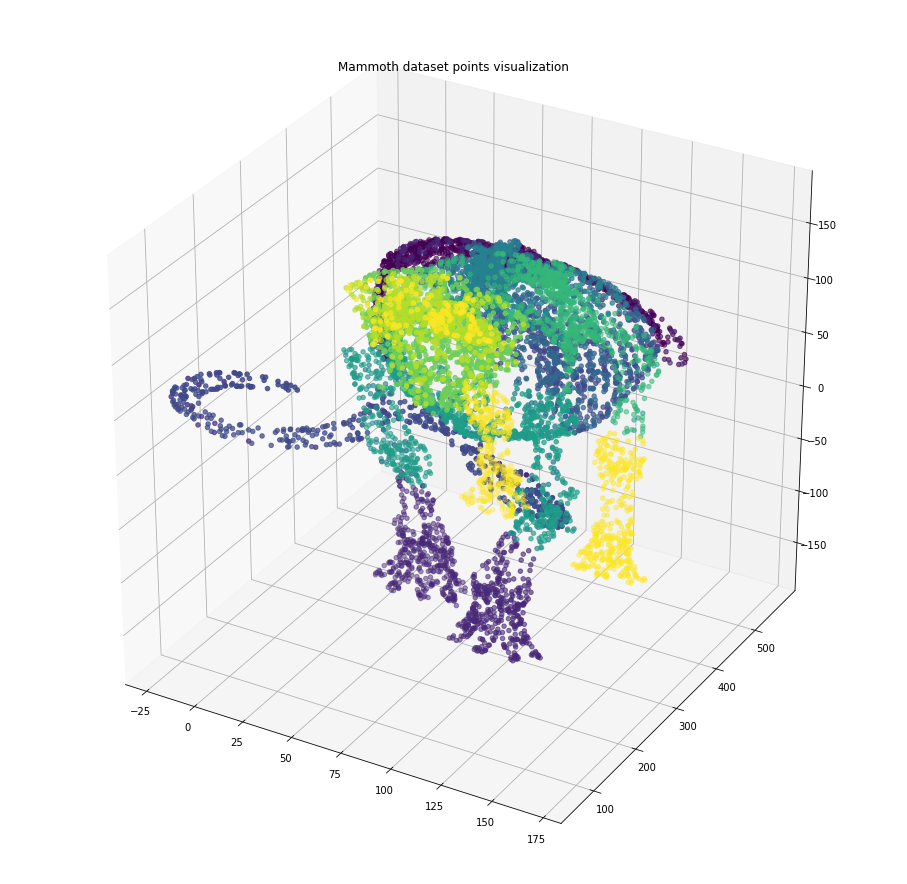

In [ ]:
# Now let's visualize the mammoth data using pyplot
def plot_3d_mammoth_scatter(x,y,z,mammoth_classes):
    fig = plt.figure(figsize=(16,16))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs=x, ys=y, zs=z, c=mammoth_classes)
    plt.title("Mammoth dataset points visualization")
    plt.show()

plot_3d_mammoth_scatter(x,y,z,mammoth_classes)

## Let's now transform the mammoth data to 2d using various methods

### Simple plot function to draw mammoth 2d visualizations

In [ ]:
def plot_2d_mammoth_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)

    for i in range(10):
        digit_indices = (y == i)

        dim1 = X[digit_indices, 0]
        dim2 = X[digit_indices, 1]
        plot.scatter(dim1, dim2, label=f"'{i}'")

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### First let's make dataframe and scale our data for better results in 2d

In [ ]:
data_mammoth = np.array([xyz[2], xyz[0], xyz[1]]).transpose()
min_max_scaler = preprocessing.MinMaxScaler()
data_mammoth_scaled = min_max_scaler.fit_transform(data_mammoth)

columns_mammoth = ['x', 'y', 'z']
df_mammoth = pd.DataFrame(data=data_mammoth_scaled, columns=columns_mammoth)

df_mammoth.head(15)

,x,y,z
0,0.243010,0.728091,0.810569
1,0.190200,0.662922,0.788558
2,0.801630,0.825924,0.735012
3,0.185681,0.712159,0.754896
4,0.522500,0.696609,0.829465
5,0.244617,0.573968,0.634007
6,0.183193,0.628288,0.720932
7,0.232100,0.746069,0.783662
8,0.200754,0.689638,0.783188
9,0.497822,0.725899,0.872186


## t-SNE

In [ ]:
tsne_p40 = TSNE(n_components=2, init="pca", learning_rate='auto', perplexity=40)
tsne_p120 = TSNE(n_components=2, init="pca", learning_rate='auto', perplexity=120)
tsne_p500 = TSNE(n_components=2, init="pca", learning_rate='auto', perplexity=500)

x_40_tsne = tsne_p40.fit_transform(df_mammoth)
x_120_tsne = tsne_p120.fit_transform(df_mammoth)
x_500_tsne = tsne_p500.fit_transform(df_mammoth)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


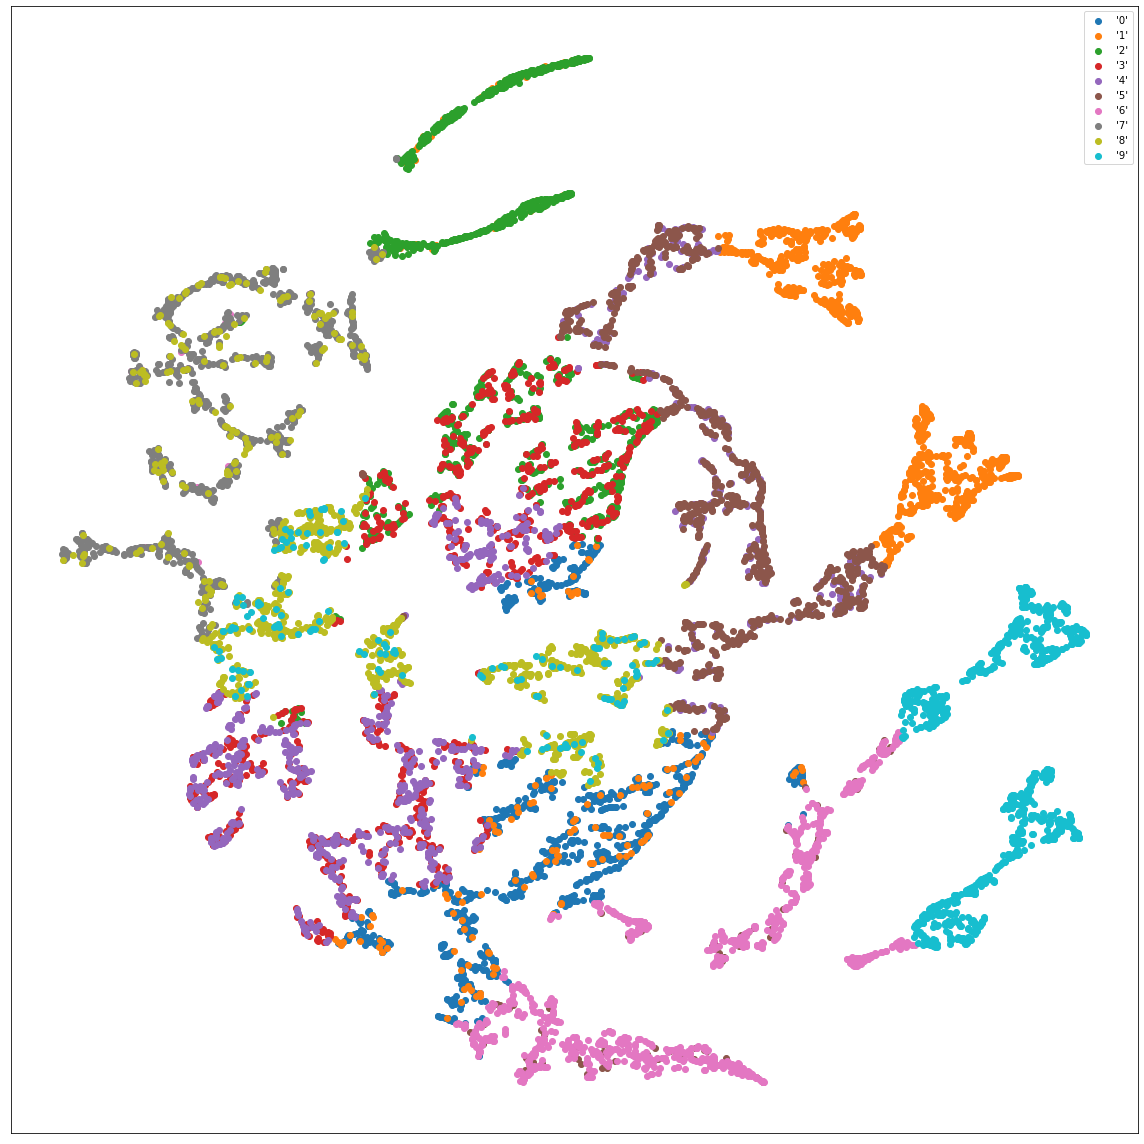

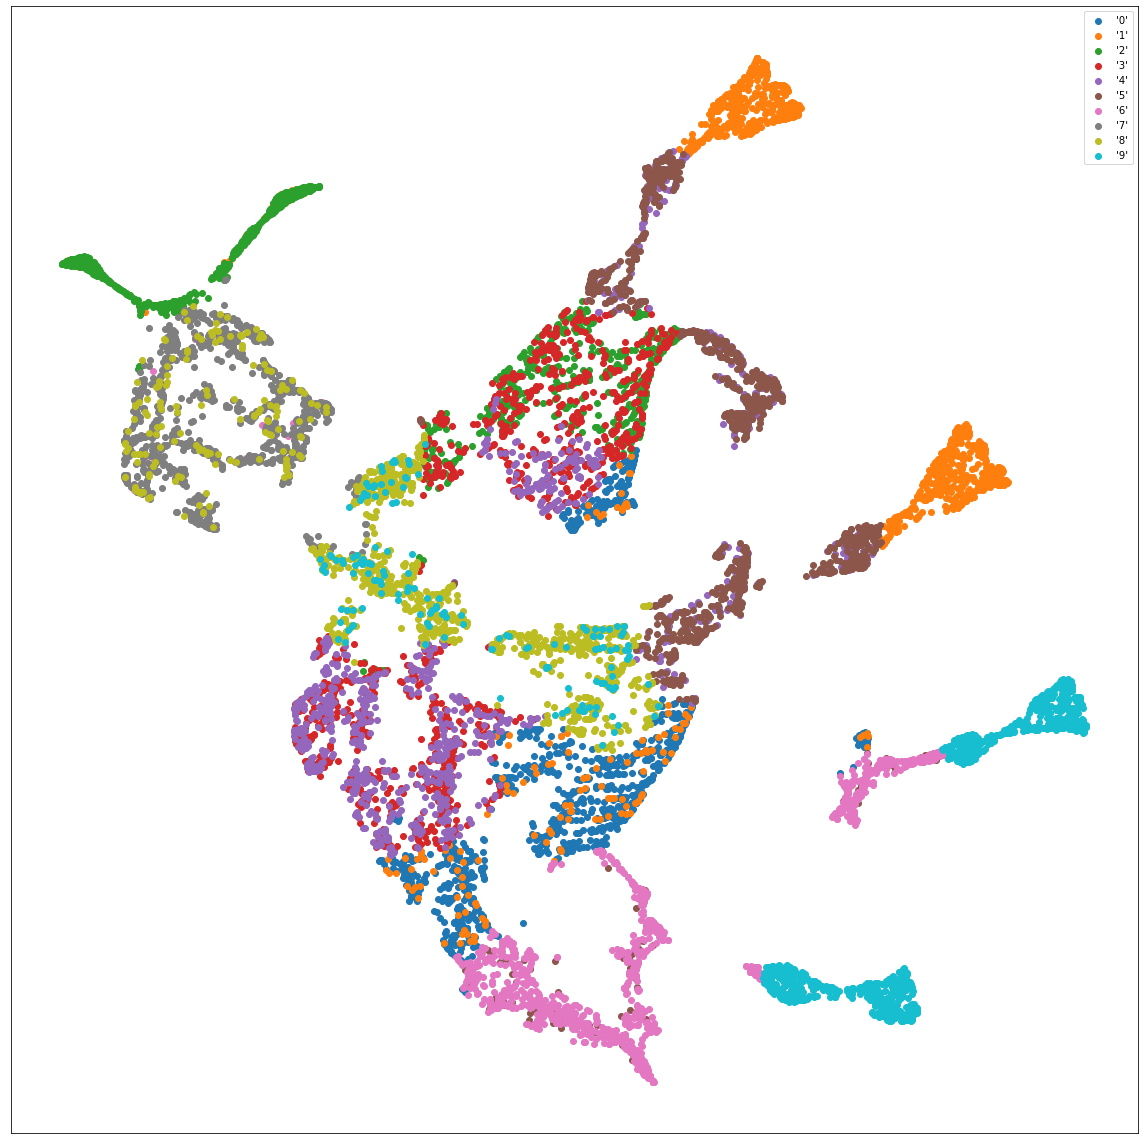

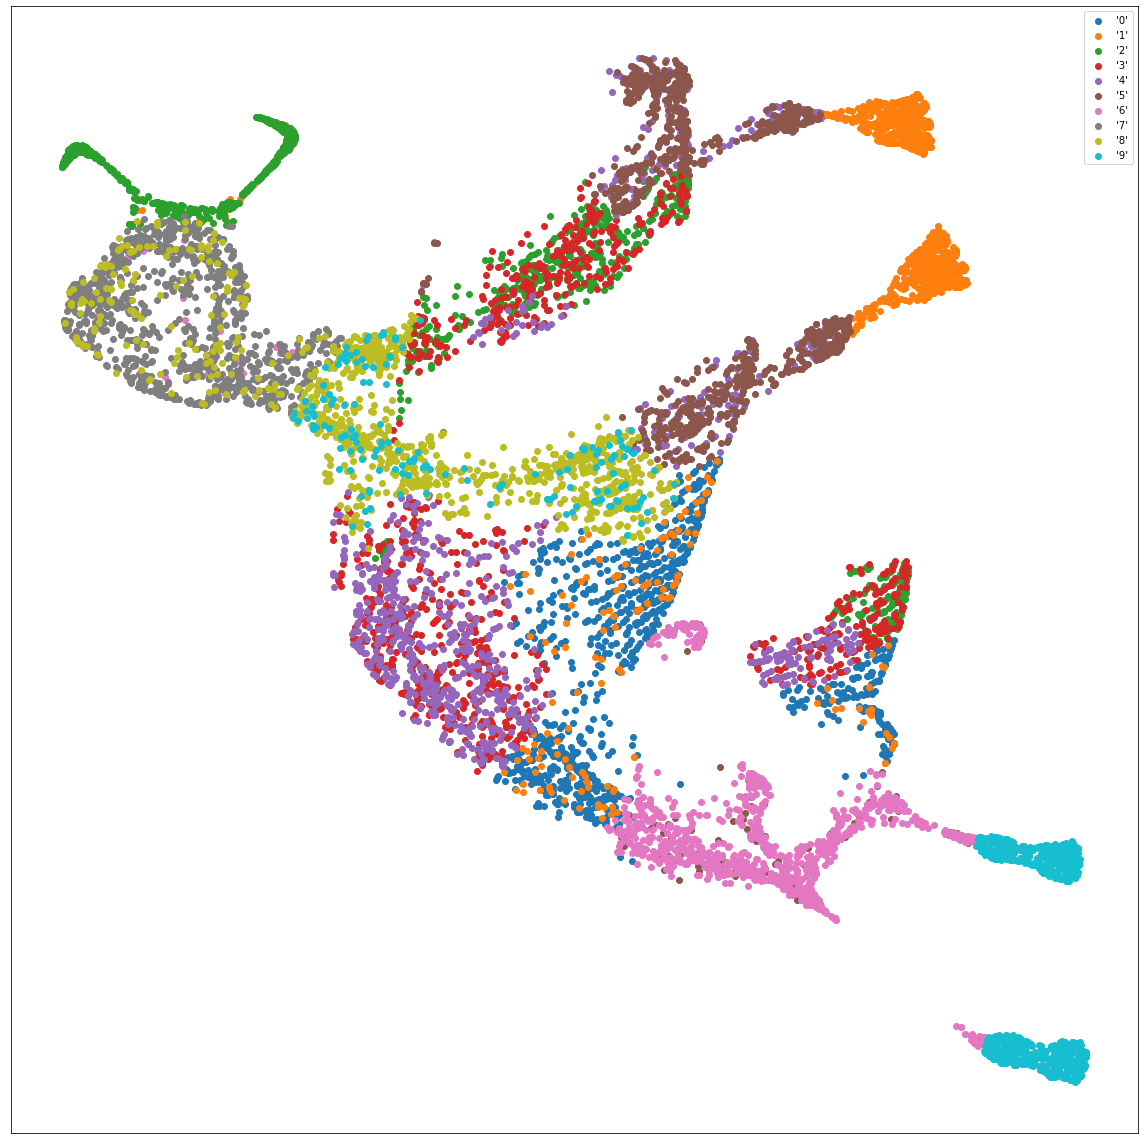

In [ ]:
plot_2d_mammoth_scatter(x_40_tsne, mammoth_classes)
plot_2d_mammoth_scatter(x_120_tsne, mammoth_classes)
plot_2d_mammoth_scatter(x_500_tsne, mammoth_classes)

## UMAP

In [60]:
umap_nn10 = umap.UMAP(n_neighbors=10)
umap_nn20 = umap.UMAP(n_neighbors=20)
umap_nn50 = umap.UMAP(n_neighbors=50)

x_10_umap = umap_nn10.fit_transform(df_mammoth)
x_20_umap = umap_nn20.fit_transform(df_mammoth)
x_50_umap = umap_nn50.fit_transform(df_mammoth)

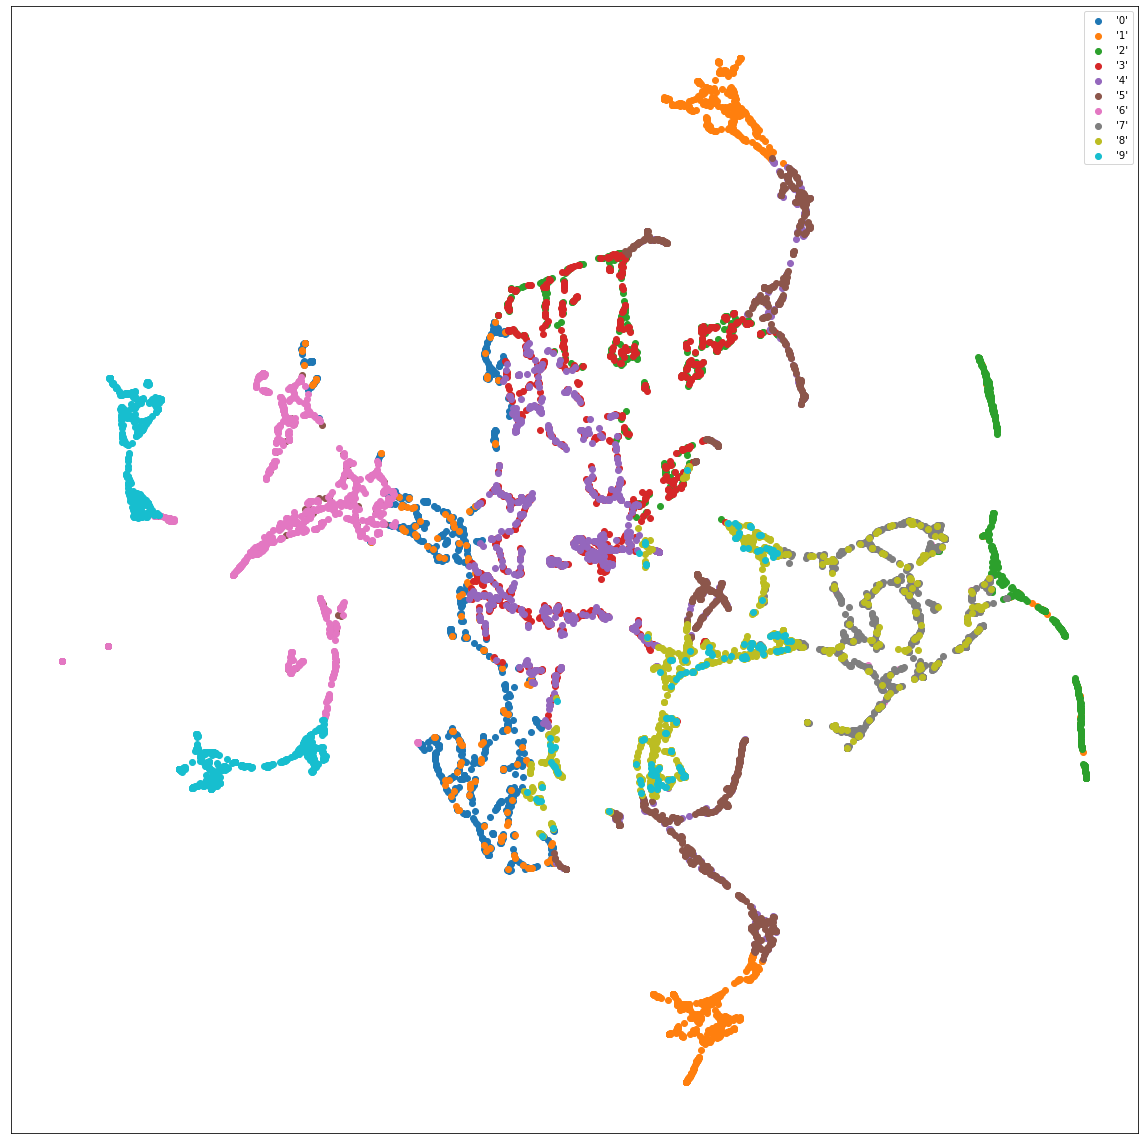

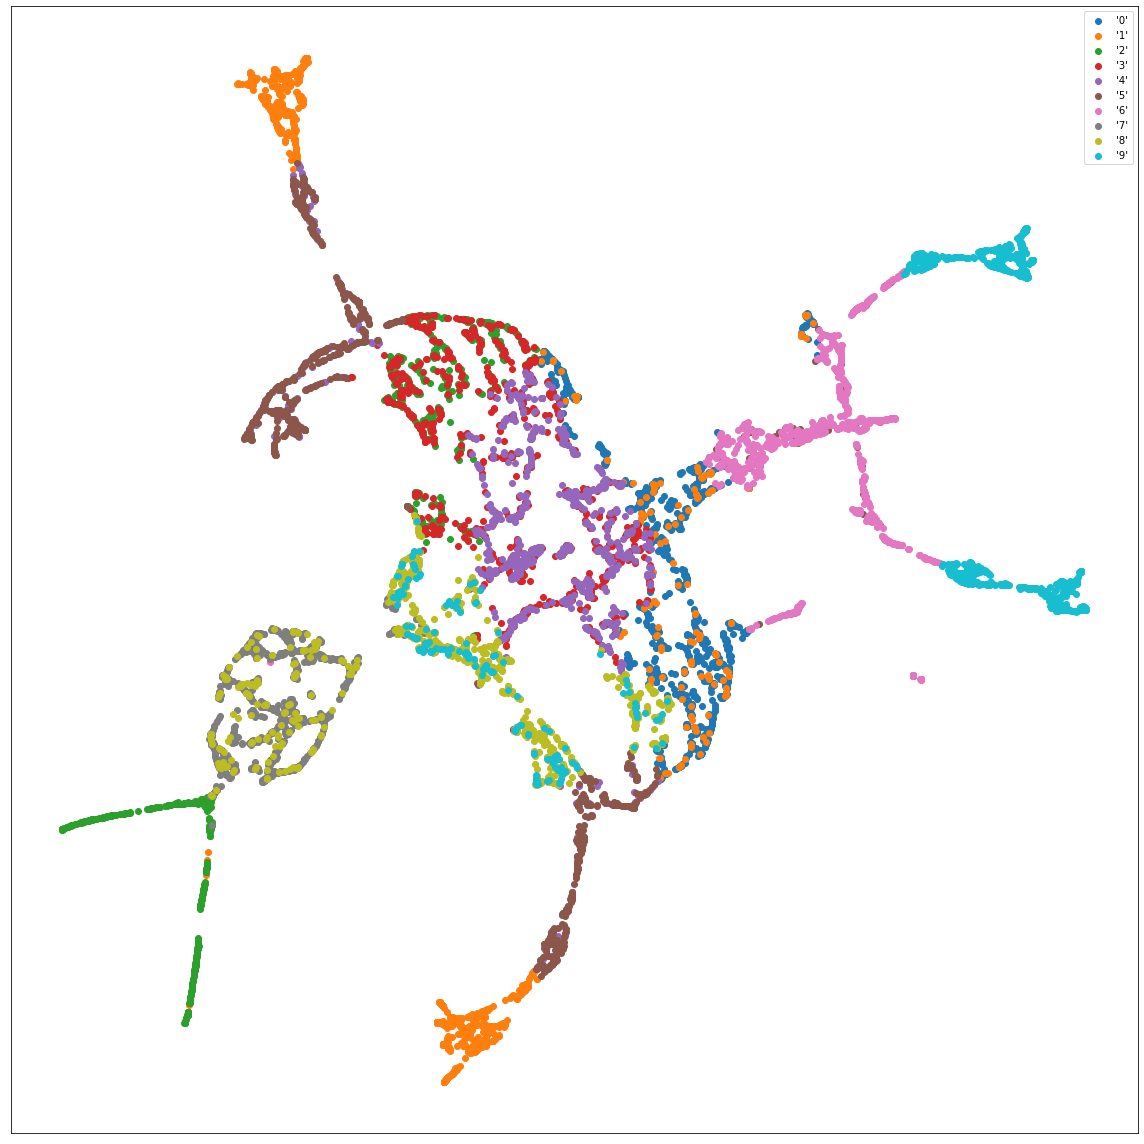

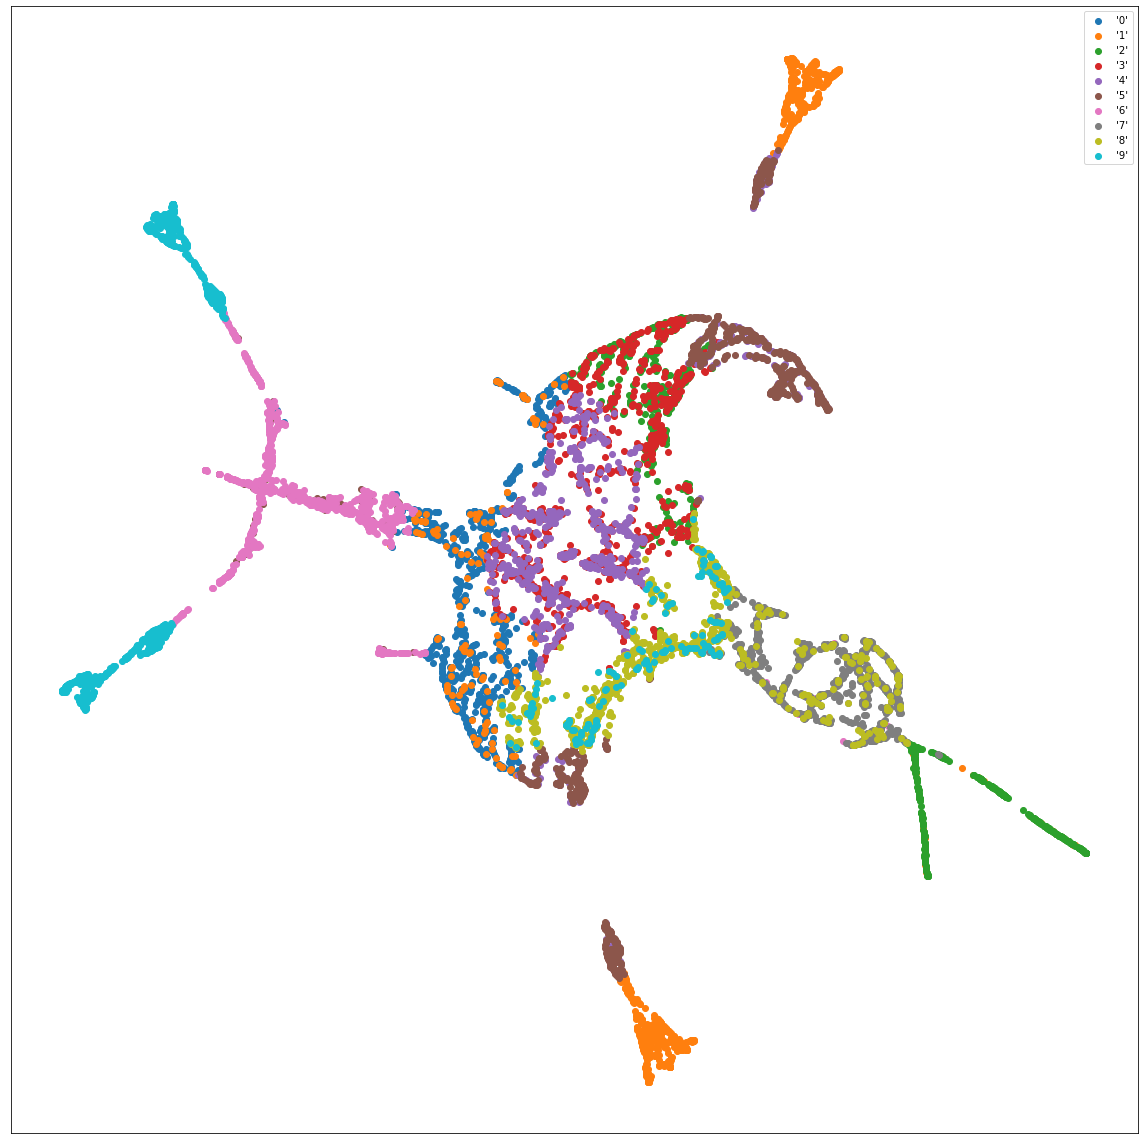

In [61]:
plot_2d_mammoth_scatter(x_10_umap, mammoth_classes)
plot_2d_mammoth_scatter(x_20_umap, mammoth_classes)
plot_2d_mammoth_scatter(x_50_umap, mammoth_classes)

## TriMAP

In [ ]:
trimap_ni10 = trimap.TRIMAP(n_inliers=10,
                            n_outliers=5,
                            n_random=5)
trimap_ni20 = trimap.TRIMAP(n_inliers=20,
                            n_outliers=5,
                            n_random=5)
trimap_ni40 = trimap.TRIMAP(n_inliers=40,
                            n_outliers=5,
                            n_random=5)

In [ ]:
x_10_trimap = trimap_ni10.fit_transform(data_mammoth_scaled)
x_20_trimap = trimap_ni10.fit_transform(data_mammoth_scaled)
x_40_trimap = trimap_ni10.fit_transform(data_mammoth_scaled)

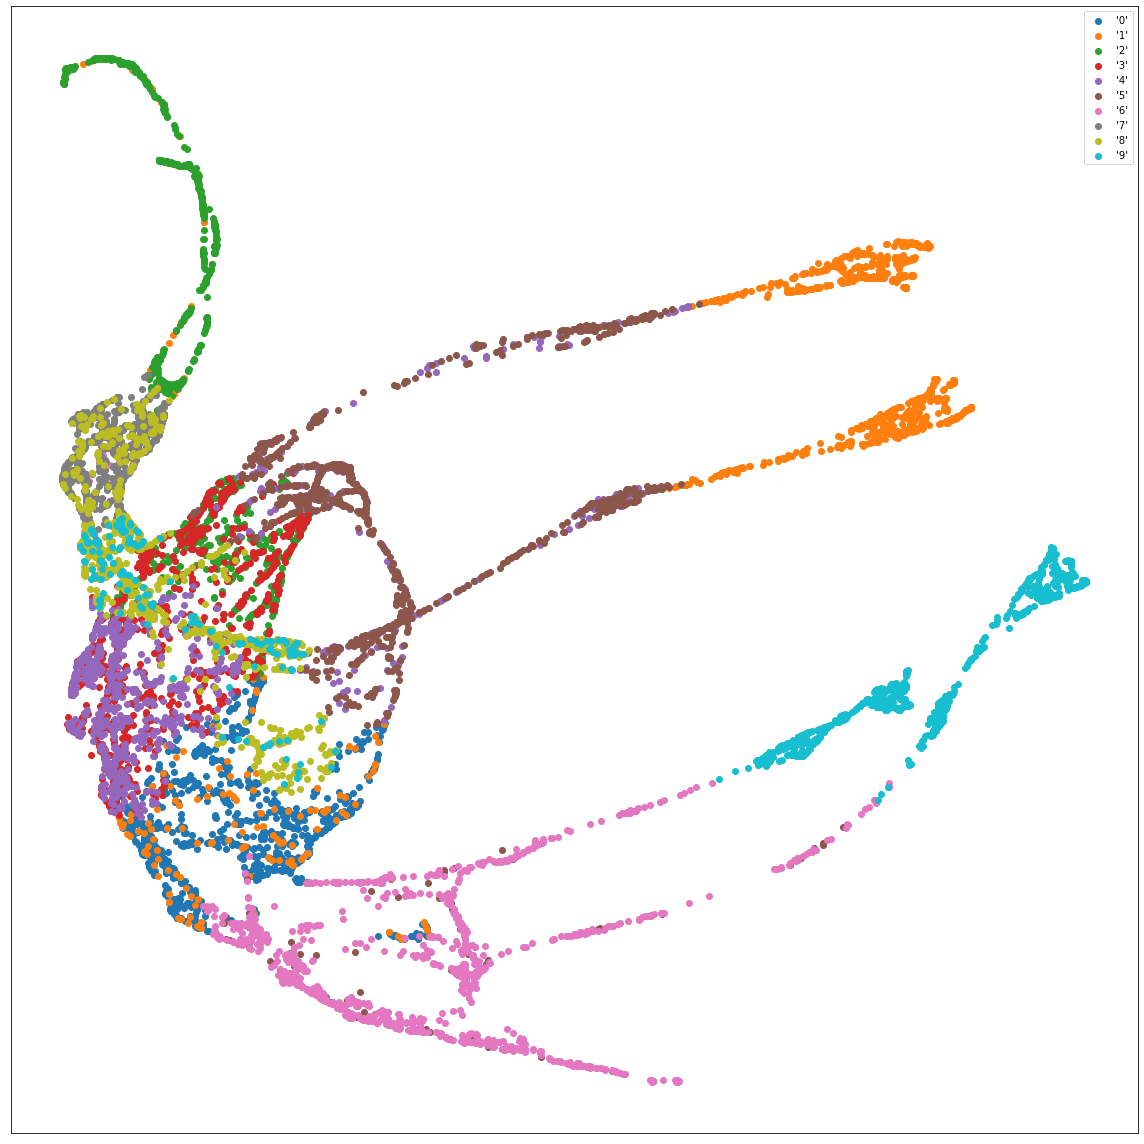

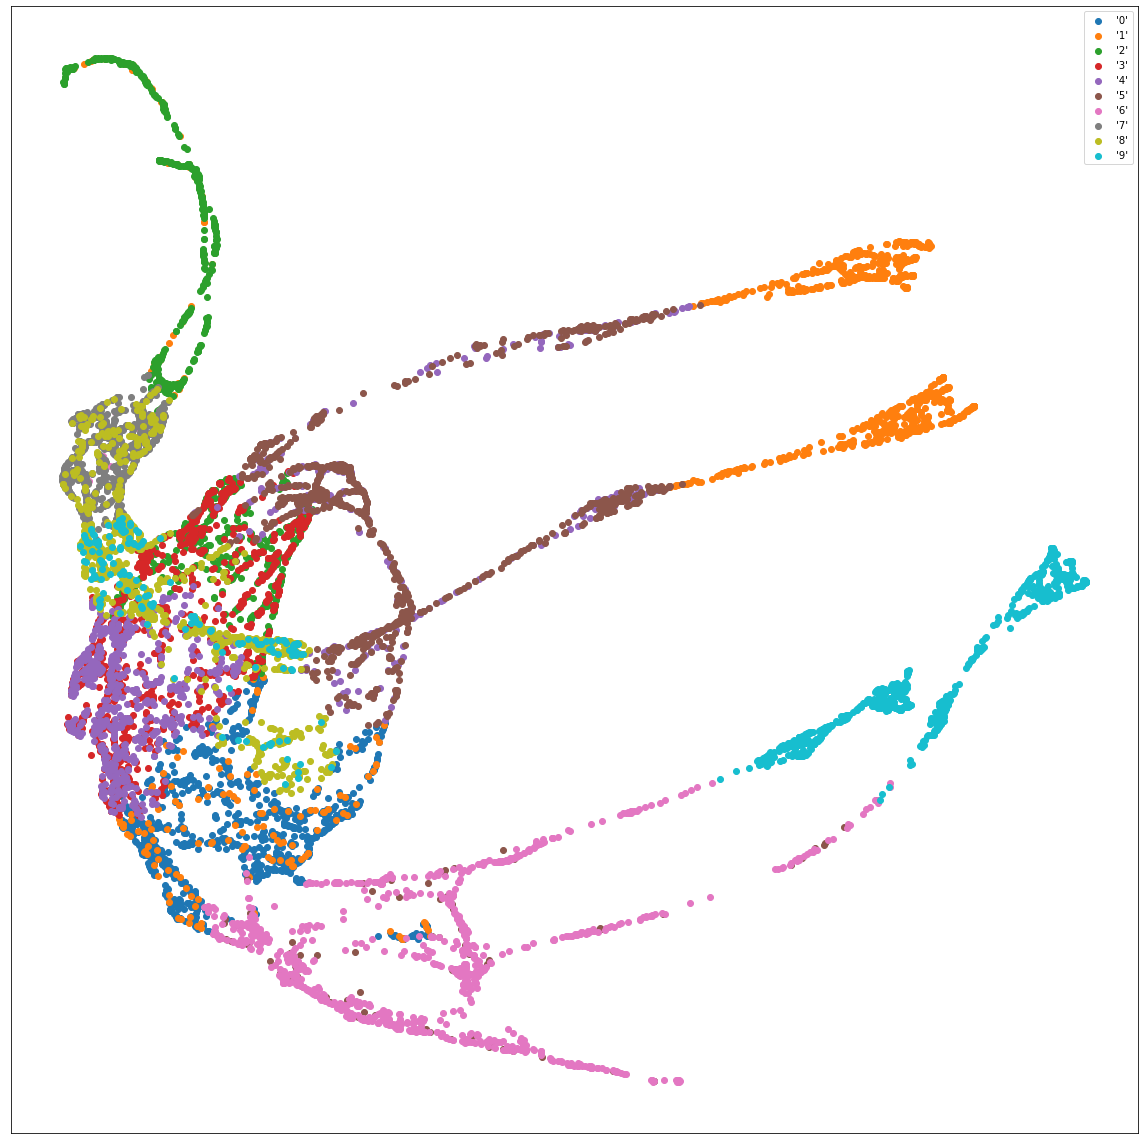

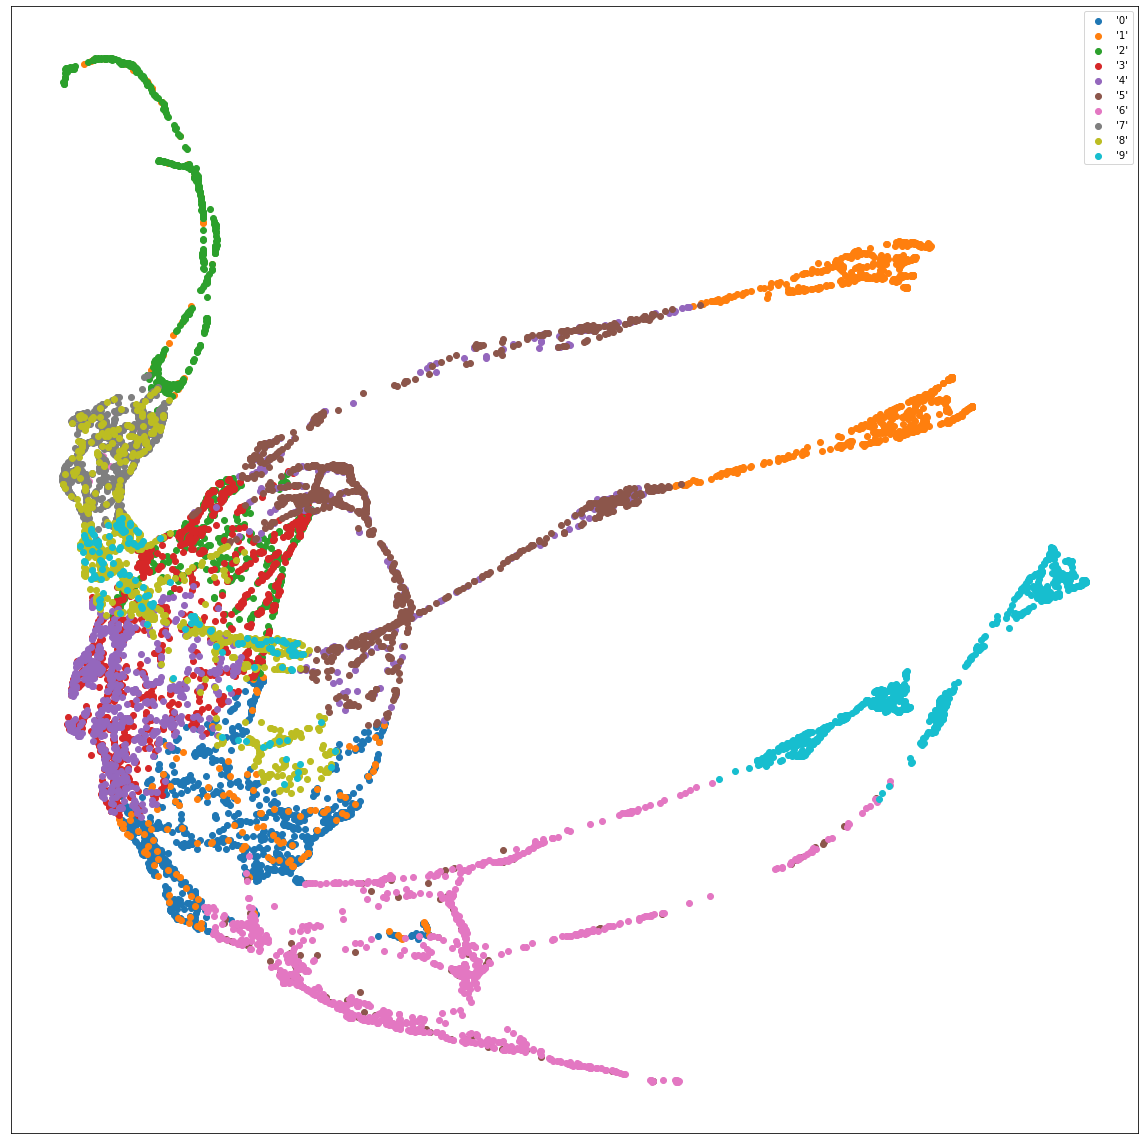

In [ ]:
plot_2d_mammoth_scatter(x_10_trimap, mammoth_classes)
plot_2d_mammoth_scatter(x_20_trimap, mammoth_classes)
plot_2d_mammoth_scatter(x_40_trimap, mammoth_classes)

## PaCMAP

In [ ]:
pacmapm = pacmap.PaCMAP(n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0)

In [ ]:
x_pacmap = pacmapm.fit_transform(data_mammoth_scaled, init="pca")

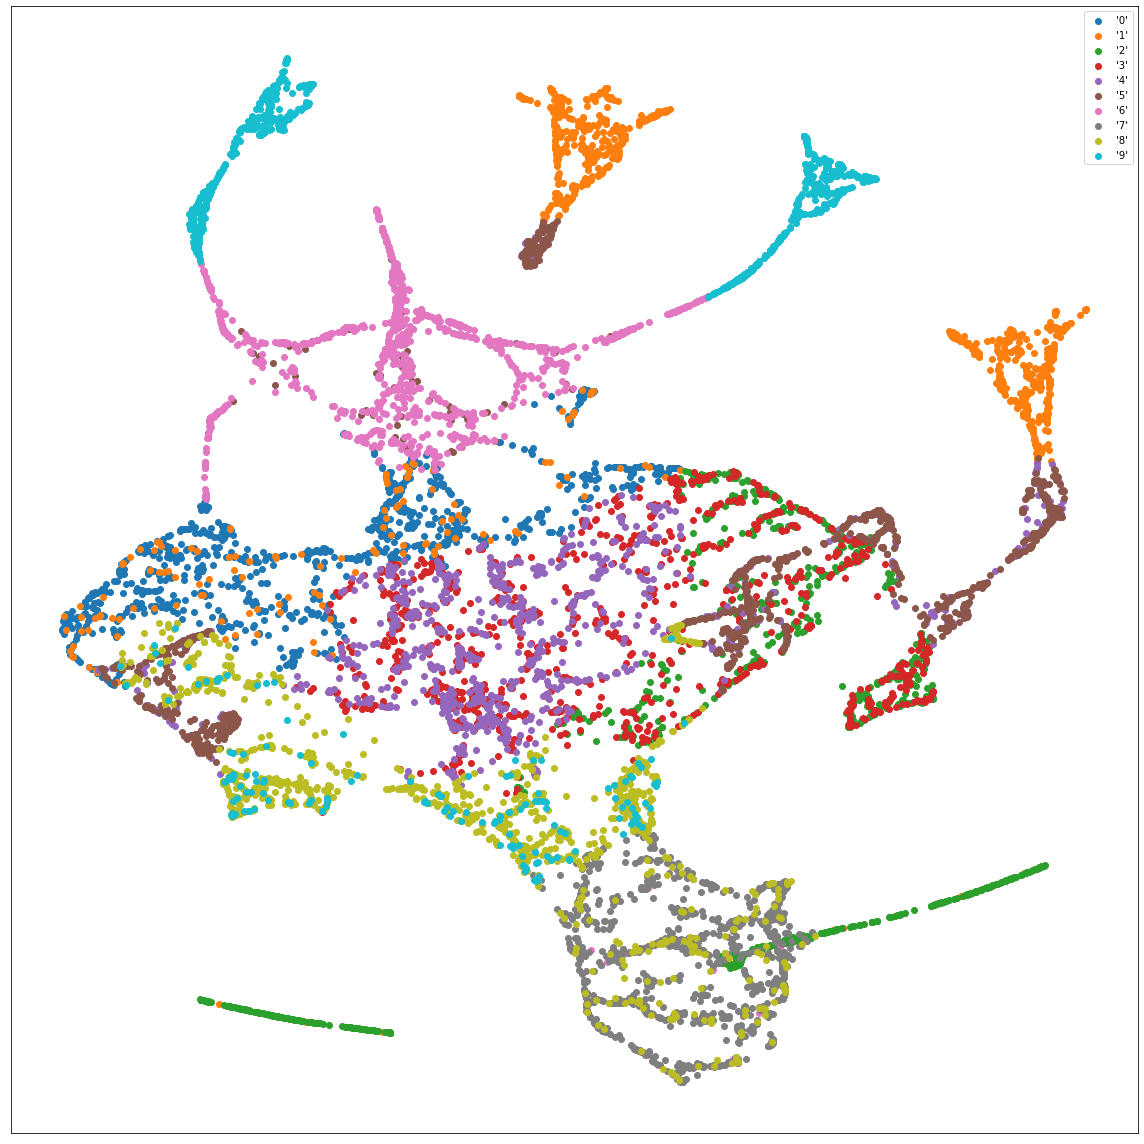

In [ ]:
plot_2d_mammoth_scatter(x_pacmap, mammoth_classes)

## IVHD

### Let's generate mammoth labels and 3d points to csv for IVHD script

In [ ]:
df_mammoth_labels = pd.DataFrame(data=mammoth_classes)

filepath = Path('data/mammoth_3d.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_mammoth.to_csv(filepath, header=False, index=False)


filepath = Path('data/mammoth_labels.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_mammoth_labels.to_csv(filepath, header=False, index=False)

### Let's now use IVHD to visualize mammoth in 2D

In [ ]:
# WIP - wtf is graph supposed to be TODO
import os

command = '{dir} "{data_csv}" "{labels_csv}" "{gp}" {output} {iter} {nn} {rn} {bd} {rns} {rnc} {l1s} "{optimizer}"'.format(
    dir = "./viskit/viskit_offline/viskit_offline",
    data_csv = "./data/mammoth_3d.csv",
    labels_csv = "./data/mammoth_labels.csv",
    gp = "./data/mammoth.bin", # graph path
    output = "./data/ivhd_mammoth.txt",
    iter = 2500,
    nn = 2, # nearestNeighborsCount
    rn = 1, # randomNeighborsCount
    bd = 1, # binaryDistances
    rns = 0, # reverseNeighborsSteps
    rnc = 0, # reverseNeighborsCount
    l1s = 0, # l1Steps
    optimizer = "force-directed"
)

os.system(command)

./viskit/viskit_offline/viskit_offline "./data/mammoth_3d.csv" "./data/mammoth_labels.csv" "./data/mammoth.bin" ./data/ivhd_mammoth.txt 2500 2 1 1 0 0 0 "force-directed"
[Info] [CSV Parser] Loading dataset from file: ./data/mammoth_3d.csv
[Info] [CSV Parser] Loading dataset from file: ./data/mammoth_labels.csv
[Info] [CSV Parser] Labels file passed.
[Info] [CSV Parser] Dataset size: 10000
[Info] [CSV Parser] Dataset dimensionality: 3
[Info] [CSV Parser] Number of classes in dataset: 10
[Info] [CSV Parser] Finished.
[Info] [Graph] Loading graph from cache...


viskit_offline: /home/ewer/Desktop/projekt/viskit/viskit/graph/Graph.cpp:216: bool viskit::graph::Graph::loadNearestNeighborsFromCache(const string&, size_t, bool): Assertion `splits.size() == 3' failed.
Aborted (core dumped)


34304

## Method comparison

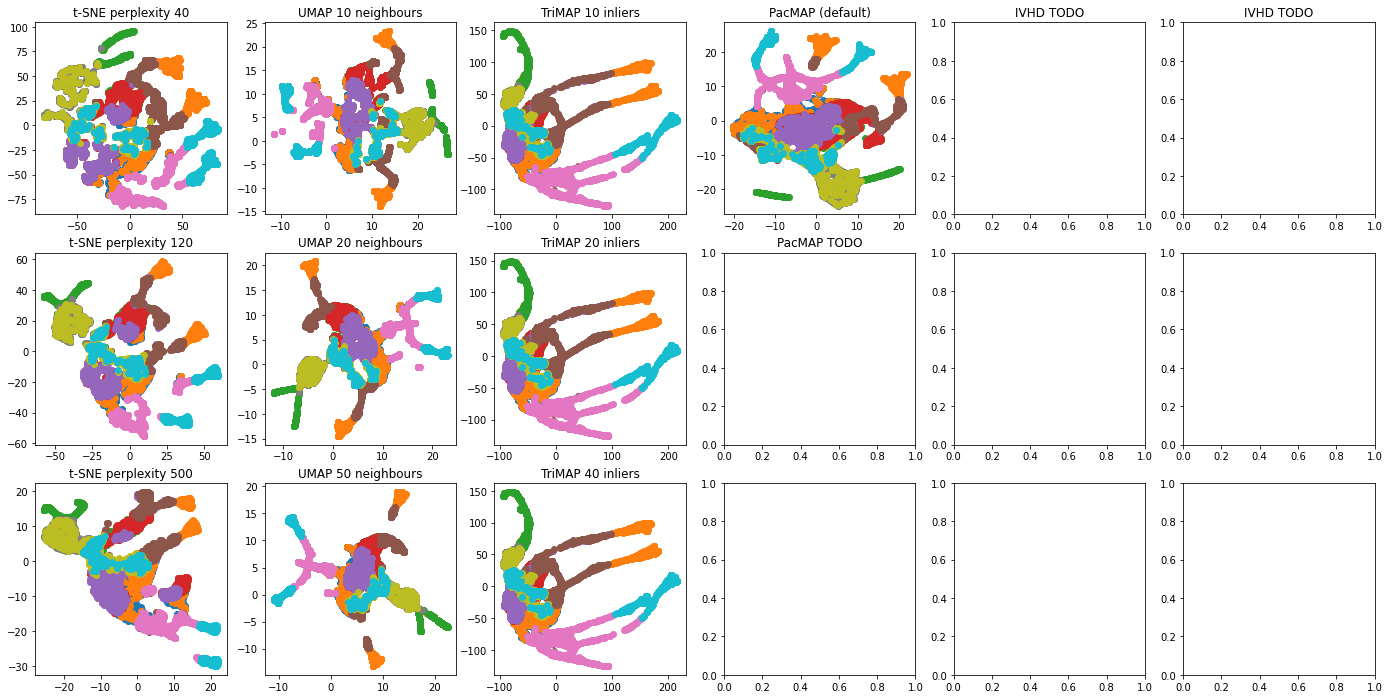

In [62]:
# 3 subplots for t-SNE
# 3 subplots for UMAP
# 3 subplots for TriMAP
# 3 subplots for PacMAP
# 6 subplots for IVHD

figure, axis = plt.subplots(3, 6)
figure.set_size_inches(24,12)
methods_names = [
    ["t-SNE perplexity 40", "t-SNE perplexity 120", "t-SNE perplexity 500"],
    ["UMAP 10 neighbours", "UMAP 20 neighbours", "UMAP 50 neighbours"], 
    ["TriMAP 10 inliers", "TriMAP 20 inliers", "TriMAP 40 inliers"], 
    ["PacMAP (default)", "PacMAP TODO", "PacMAP TODO"], 
    ["IVHD TODO", "IVHD TODO", "IVHD TODO"], 
    ["IVHD TODO", "IVHD TODO", "IVHD TODO"],
]
todo_res = np.array([])
methods_results = [
    [x_40_tsne, x_120_tsne, x_500_tsne],
    [x_10_umap, x_20_umap, x_50_umap],
    [x_10_trimap, x_20_trimap, x_40_trimap],
    [x_pacmap, todo_res, todo_res],
    [todo_res, todo_res, todo_res],
    [todo_res, todo_res, todo_res],
]

for j in range(6):
    for i in range(3):
        axis[i, j].set_title(methods_names[j][i])

        X = methods_results[j][i]
        if not X.any(): # temporary for non-existant plot data
            break
        
        for k in range(10):
            digit_indices = (mammoth_classes == k)
            dim1 = X[digit_indices, 0]
            dim2 = X[digit_indices, 1]
            axis[i, j].scatter(dim1, dim2, label=f"'{i}'")
            

plt.show()

## Metrics comparison for methods